In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , accuracy_score 

In [214]:
raptor =pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/eoraptor/eoraptor.csv")  
raptor 

# 에오랍토르 화석 데이터셋 
#mm - head , skull , foot , earconch eye
#나머지는 cm  

# case : 인덱스 번호
# site : 발굴 위치
# sex : 에오랍토르의 성별
# age : 에오랍토르의 나이
# head_length : 머리 길이
# skull_width : 두개골 폭
# total_length : 총 길이
# tail_length : 꼬리 길이
# foot_length : 발 길이
# earconch : 귀 주변 뼈 직경
# eye : 눈 주변 뼈 직경
# chest : 흉통 직경 
# belly : 골반 직경
 

,case,site,sex,age,head_length,skull_width,total_length,tail_length,foot_length,earconch,eye,chest,belly
0,1,1,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [3]:
#결측치 확인
raptor.isna().sum()

case            0
site            0
sex             0
age             2
head_length     0
skull_width     0
total_length    0
tail_length     0
foot_length     1
earconch        0
eye             0
chest           0
belly           0
dtype: int64

In [4]:
#결측치 최빈값으로 
raptor = raptor.fillna(raptor.mode().iloc[0])
raptor.isna().sum()

case            0
site            0
sex             0
age             0
head_length     0
skull_width     0
total_length    0
tail_length     0
foot_length     0
earconch        0
eye             0
chest           0
belly           0
dtype: int64

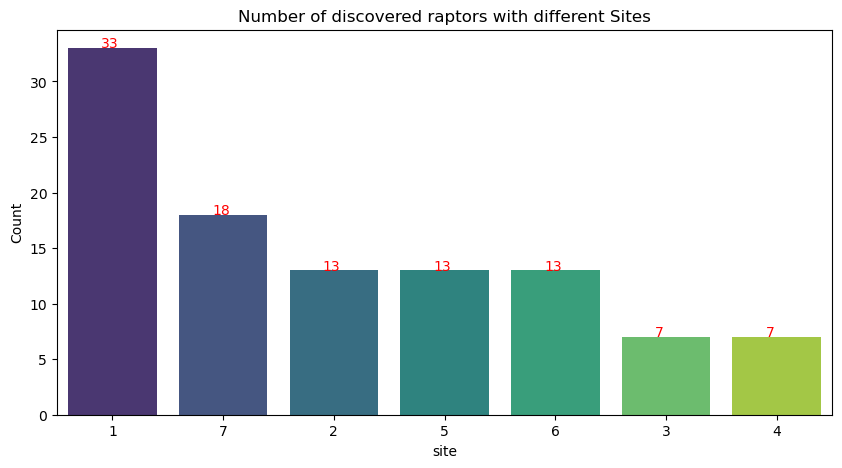

In [6]:
#위치별 발굴 개수.
site = raptor["site"].value_counts().sort_values(ascending = False)
plt.figure(figsize=(10,5))
sns.countplot(x = "site", data = raptor, palette = "viridis", order = site.index)
for i , v in enumerate(site):
    plt.text(i-0.1 , v+0.02 , "{:.0f}".format(v) ,color="red") 
plt.title("Number of discovered raptors with different Sites")
plt.ylabel("Count")
plt.show()

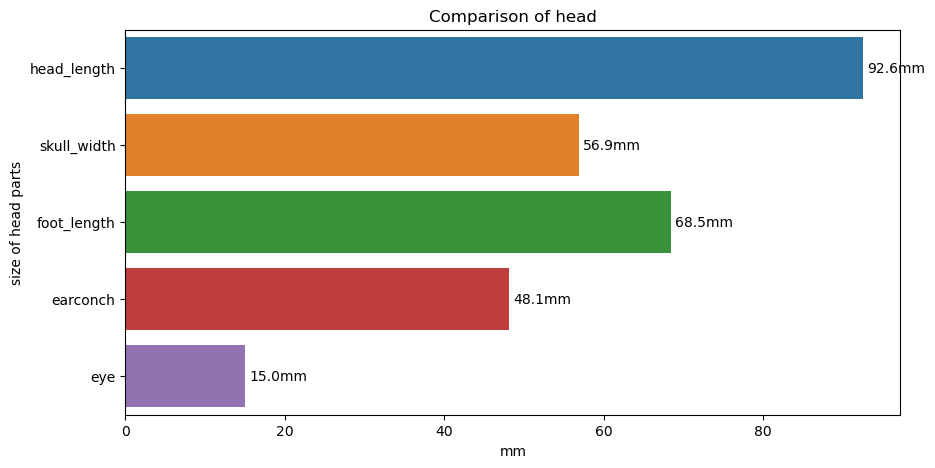

In [8]:
#머리 구성요소 평균 크기
head = ["head_length", "skull_width", "foot_length", "earconch", "eye"] 
plt.figure(figsize = (10,5))
ax =sns.barplot(data=raptor[head], orient='h', errorbar= None) 
for i, v in enumerate(raptor[head].mean()):
    ax.text(v + 0.5, i, str(str(round(v, 1))+"mm"), color='black', va='center') 
plt.title("Comparison of head") 
plt.xlabel("mm")
plt.ylabel("size of head parts")
plt.show() 

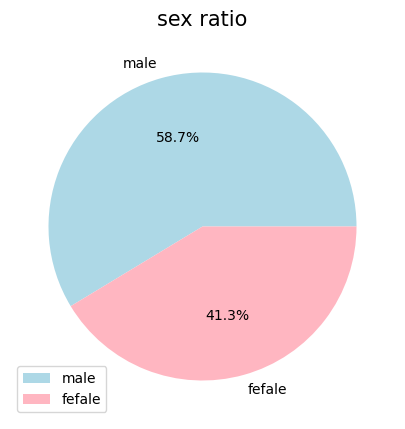

0    61
1    43
Name: sex, dtype: int64


In [224]:
#암컷 수컷 비율, 마리수 
plt.figure(figsize = (10,5))

df_count = raptor.groupby(['sex']).size()
plt.pie(df_count,
        labels = ['male','fefale'],
        autopct = '%.1f%%',
        colors = ['lightblue','lightpink'])
plt.title('sex ratio', fontsize = 15)

plt.legend(loc= 'lower left')
plt.show() 
print(raptor['sex'].value_counts())

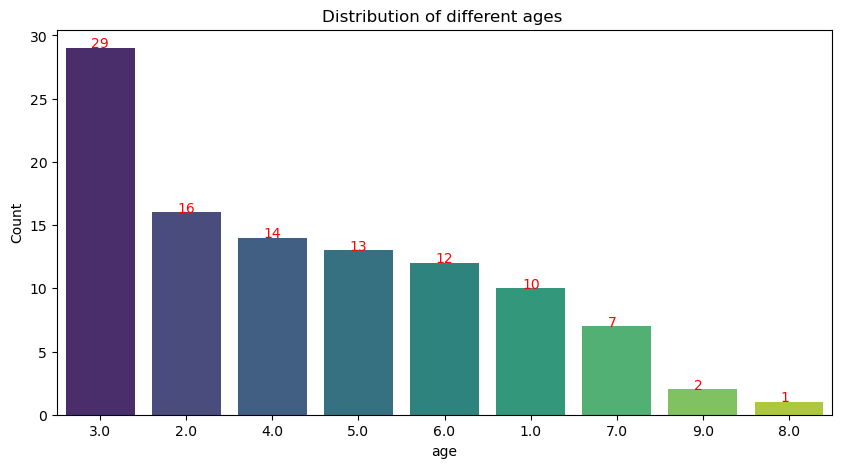

In [10]:
#나이별 분포 
site = raptor["age"].value_counts().sort_values(ascending = False)
plt.figure(figsize=(10,5))
sns.countplot(x = "age", data = raptor, palette = "viridis", order = site.index)
for i , v in enumerate(site):
    plt.text(i-0.1 , v+0.02 , "{:.0f}".format(v) ,color="red") 
plt.title("Distribution of different ages ")
plt.ylabel("Count")
plt.show()

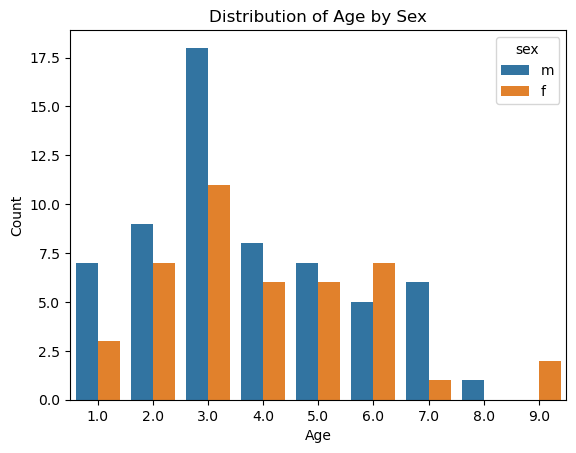

In [11]:
# 나이에 따른 성별분포
sns.countplot(x="age", hue="sex", data=raptor)
plt.title("Distribution of Age by Sex")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

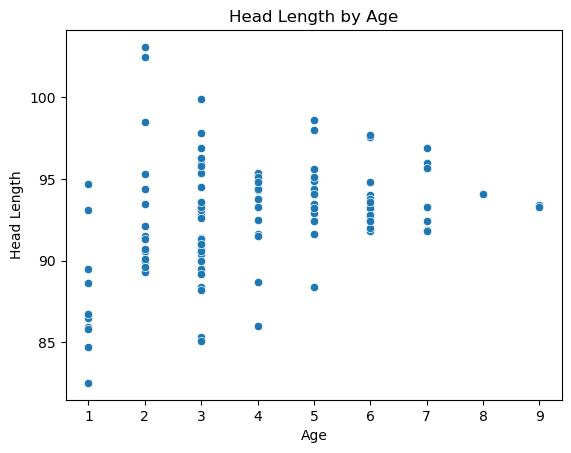

In [12]:
# 머리 길이와 나이의 상관 관계
sns.scatterplot(x="age", y="head_length", data=raptor)
plt.title("Head Length by Age")
plt.xlabel("Age")
plt.ylabel("Head Length")
plt.show()

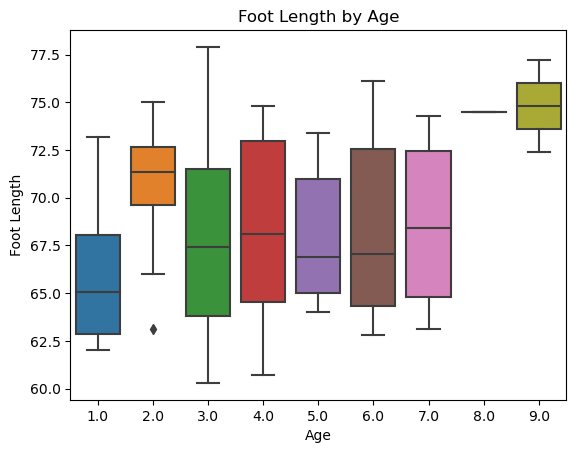

In [13]:
# 발 길이와 나이의 상자 그림
sns.boxplot(x="age", y="foot_length", data=raptor)
plt.title("Foot Length by Age")
plt.xlabel("Age")
plt.ylabel("Foot Length")
plt.show()

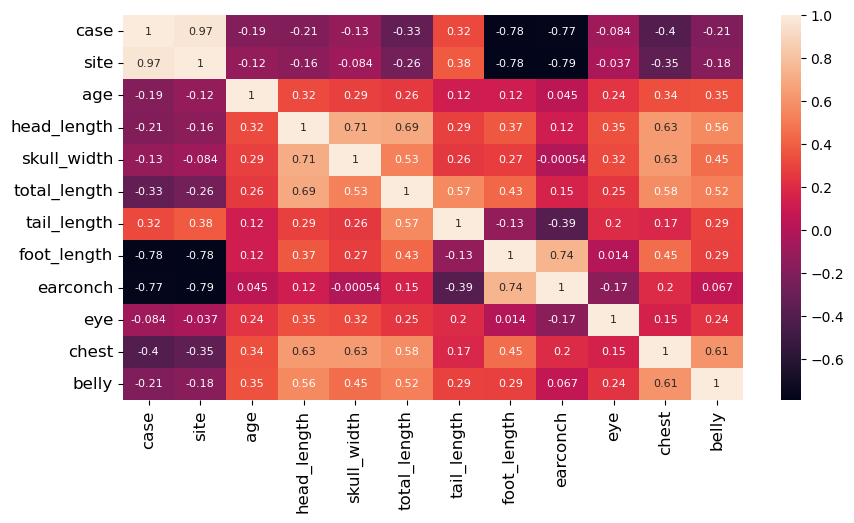

In [38]:
plt.figure(figsize= (10,5))

sns.heatmap(raptor.corr(), annot= True, annot_kws= {'size':8})
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

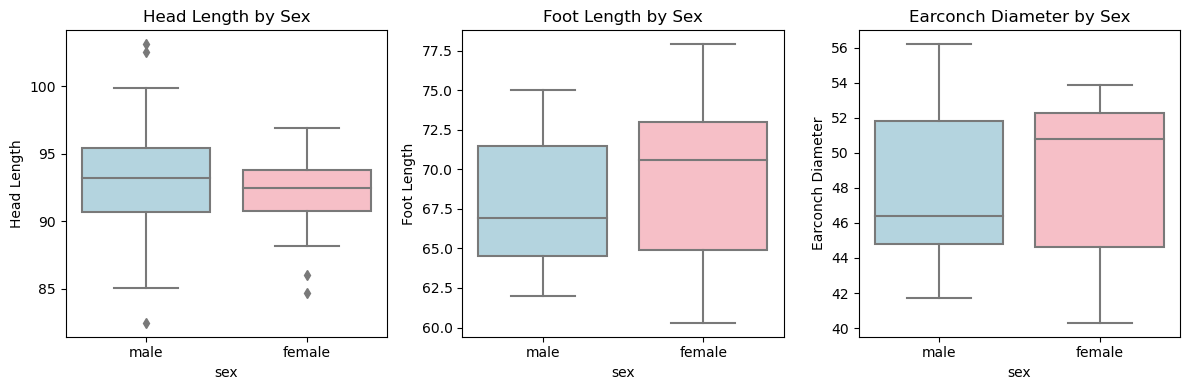

In [149]:
 # 성별에 따른 머리, 발 , 귀 주변 뼈 직경 길이 분포
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.boxplot(ax=axes[0], x="sex", y="head_length", data=raptor, palette=["lightblue", "lightpink"])
axes[0].set_title("Head Length by Sex")
axes[0].set_ylabel("Head Length")

sns.boxplot(ax=axes[1], x="sex", y="foot_length", data=raptor, palette=["lightblue", "lightpink"])
axes[1].set_title("Foot Length by Sex")
axes[1].set_ylabel("Foot Length")

sns.boxplot(ax=axes[2], x="sex", y="earconch", data=raptor, palette=["lightblue", "lightpink"])
axes[2].set_title("Earconch Diameter by Sex")
axes[2].set_ylabel("Earconch Diameter")

plt.tight_layout()
plt.show()


In [121]:
# 성별을 예측하고 정확도를 평가하는 예시
X= raptor[['head_length', 'skull_width', 'total_length', 'tail_length', 'foot_length', 'earconch', 'eye', 'chest', 'belly']]
y= raptor["sex"]

X_train, X_test , y_train, y_test = train_test_split(X , y ,test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(pred, y_test)
print("정확도 : "+str(round(accuracy,2))+"%")

정확도 : 0.67%


In [90]:
# 성별 별 길이 통계 계산
site_stats = raptor.groupby('sex')['total_length'].agg(['mean', 'min', 'max', 'median']) 
print("총 길이 통계")
print(site_stats)
 
head_stats = raptor.groupby('sex')['head_length'].agg(['mean', 'min', 'max', 'median']) 
print("\n머리 길이 통계")
print(head_stats)
  
print("\n발 길이 통계")
foot_stats = raptor.groupby('sex')['foot_length'].agg(['mean', 'min', 'max', 'median']) 
print(foot_stats)
  
chest_stats = raptor.groupby('sex')['chest'].agg(['mean', 'min', 'max', 'median']) 
print("\n가슴 크기 통계")
print(chest_stats) 

총 길이 통계
             mean   min   max  median
sex                                  
female  87.906977  75.0  96.5    88.5
male    86.511475  76.0  96.0    86.0

머리 길이 통계
             mean   min    max  median
sex                                   
female  92.148837  84.7   96.9    92.5
male    92.922951  82.5  103.1    93.2

발 길이 통계
             mean   min   max  median
sex                                  
female  69.206977  60.3  77.9    70.6
male    68.009836  62.0  75.0    66.9

가슴 크기 통계
             mean   min   max  median
sex                                  
female  27.337209  23.0  31.0    28.0
male    26.762295  22.0  32.0    27.0


In [120]:
# 지역을 예측하고 정확도를 평가하는 예시
X= raptor[['head_length', 'skull_width', 'total_length', 'tail_length', 'foot_length', 'earconch', 'eye', 'chest', 'belly']]
y= raptor["site"]

X_train, X_test , y_train, y_test = train_test_split(X , y ,test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(pred, y_test)
print("정확도 : "+str(round(accuracy,2))+"%")

정확도 : 0.52%


In [68]:
# 지역별 길이 통계 계산
site_stats = raptor.groupby('site')['total_length'].agg(['mean', 'min', 'max', 'median']) 
print("총 길이 통계")
print(site_stats)
 
head_stats = raptor.groupby('site')['head_length'].agg(['mean', 'min', 'max', 'median']) 
print("\n머리 길이 통계")
print(head_stats)
  
foot_stats = raptor.groupby('site')['foot_length'].agg(['mean', 'min', 'max', 'median']) 
print("\n발 길이 통계")
print(foot_stats)
  
chest_stats = raptor.groupby('site')['chest'].agg(['mean', 'min', 'max', 'median']) 
print("\n가슴 크기 통계")
print(chest_stats) 

총 길이 통계
           mean   min   max  median
site                               
1     89.712121  84.0  96.5    89.5
2     81.769231  75.0  88.0    82.5
3     88.071429  85.0  93.5    88.0
4     92.242857  88.0  96.0    92.5
5     86.923077  80.5  90.5    88.0
6     84.538462  80.5  92.0    84.0
7     85.694444  81.5  93.0    85.0

머리 길이 통계
           mean   min    max  median
site                                
1     93.724242  90.5   96.3    93.8
2     89.738462  84.7   94.4    90.6
3     94.571429  90.1   98.6    95.4
4     97.614286  91.3  103.1    96.9
5     92.176923  82.5   98.0    92.8
6     89.246154  85.8   93.8    88.7
7     92.633333  88.6   98.5    92.1

발 길이 통계
           mean   min   max  median
site                               
1     72.996970  68.0  77.9   73.20
2     70.938462  62.7  74.3   71.50
3     66.600000  64.0  69.0   66.90
4     68.928571  63.1  73.2   68.70
5     64.730769  62.0  68.2   65.00
6     63.069231  60.3  66.2   62.80
7     65.738889  62.9  71.7 

In [122]:
# 나이를 예측하고 정확도를 평가하는 예시
X= raptor[['head_length', 'skull_width', 'total_length', 'tail_length', 'foot_length', 'earconch', 'eye', 'chest', 'belly']]
y= raptor["age"]

X_train, X_test , y_train, y_test = train_test_split(X , y ,test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(pred, y_test)
print("정확도 : "+str(round(accuracy,2))+"%")

정확도 : 0.19%


In [59]:
# 나이별 총 길이 통계 계산
age_stats = raptor.groupby('age')['total_length'].agg(['mean', 'min', 'max', 'median']) 
print(age_stats)

          mean   min   max  median
age                               
1.0  82.750000  75.0  90.5   81.75
2.0  87.375000  81.0  96.0   86.50
3.0  87.179310  76.0  96.5   88.00
4.0  86.571429  82.0  94.0   85.50
5.0  87.423077  83.0  92.0   88.00
6.0  89.833333  84.0  95.5   89.75
7.0  86.714286  80.5  91.5   87.00
8.0  89.000000  89.0  89.0   89.00
9.0  90.500000  89.5  91.5   90.50


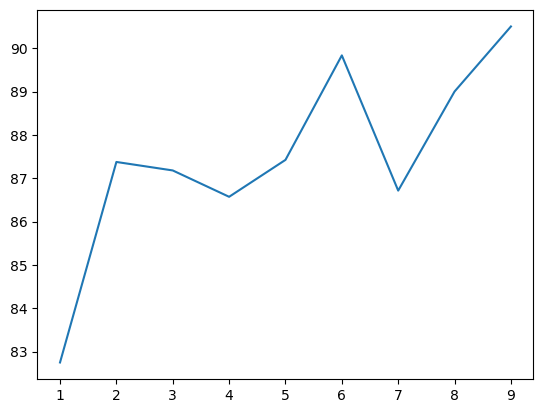

In [150]:
#나이에 따른 토탈 길이 변화. 

age_length = raptor.groupby("age")["total_length"].mean()
plt.plot(age_length)
plt.show()

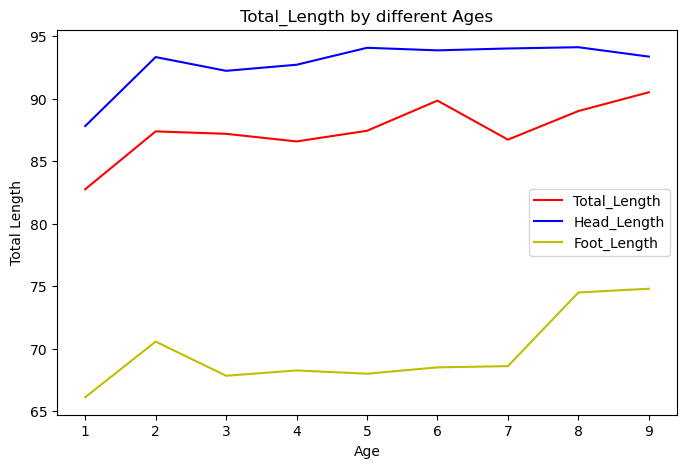

In [147]:
#각각의 다른나이에 대한 길이 그래프.

age_length = raptor.groupby("age")["total_length"].mean().reset_index()
head_length = raptor.groupby("age")["head_length"].mean().reset_index() 
foot_length = raptor.groupby("age")["foot_length"].mean().reset_index()

lengthBox = [age_length,head_length,tail_length,foot_length]
plt.figure(figsize=(8, 5))
sns.lineplot(x="age", y="total_length", data=age_length, color='r', label="Total_Length")
sns.lineplot(x="age", y="head_length", data=head_length, color='b', label="Head_Length")
sns.lineplot(x="age", y="foot_length", data=foot_length, color='y', label="Foot_Length")

plt.title("Total_Length by different Ages")
plt.xlabel("Age")
plt.ylabel("Total Length")
plt.show()

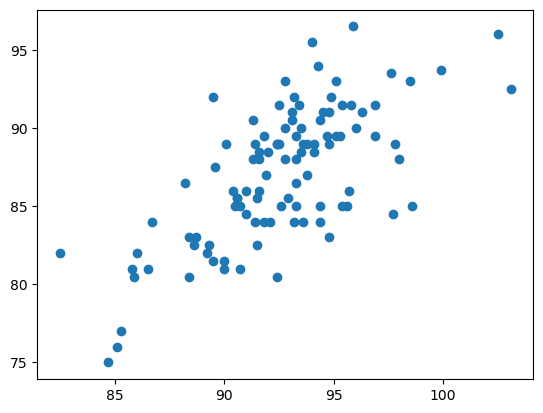

In [157]:
X = raptor['head_length'].values.reshape(-1, 1)
y = raptor['total_length'].values.reshape(-1, 1)
plt.figure()  
plt.scatter(X , y) 
plt.show()

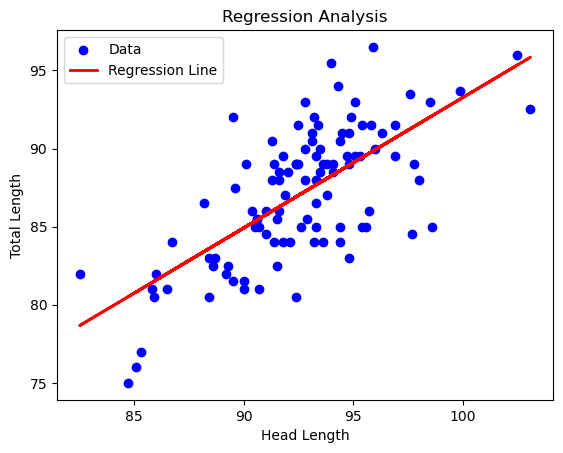

In [174]:
# 머리 길이, 총 길이 상관 관계 확인
 
X = raptor['head_length'].values.reshape(-1, 1)
y = raptor['total_length'].values.reshape(-1, 1)

# 회귀 모델 학습
regression_model = LinearRegression()
regression_model.fit(X, y)
pred=regression_model.predict(X)

# 회귀선 시각화
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, pred , color='red', linewidth=2, label='Regression Line')
plt.title('Regression Analysis')
plt.xlabel('Head Length')
plt.ylabel('Total Length')
plt.legend()
plt.show()

#회귀선의 기울기와 방향을 통해 머리 길이가 증가할 때 총 길이도 어떻게 변하는지 알 수 있음

In [172]:
X = raptor[["head_length", "skull_width", "tail_length", "foot_length"]]
y = raptor["total_length"]

# 데이터를 학습 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측
y_pred = model.predict(X_test)

# 모델의 성능 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) 
mae = mean_absolute_error( y_test ,y_pred )
print("mean_absolute_error:", mae)  

Mean Squared Error: 8.473254204567414
mean_absolute_error: 2.4035989636121236


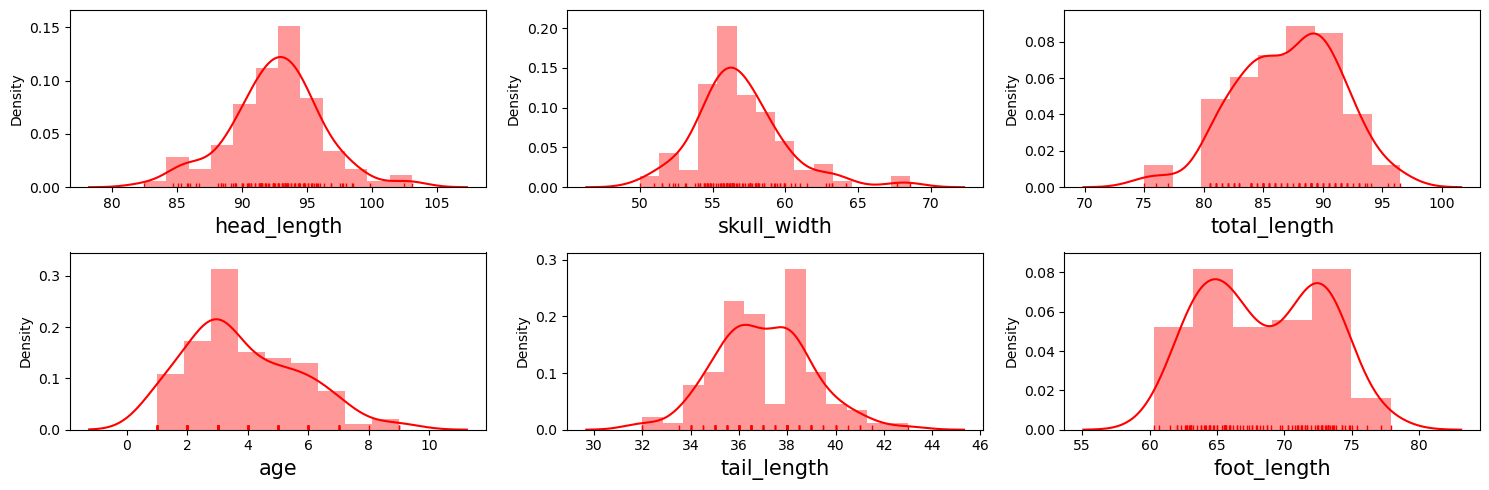

In [199]:
#길이 별  + age  분포 
num_index = ['head_length','skull_width','total_length','age','tail_length','foot_length']
plt.figure(figsize= (15,5))

for i in range(6) :
    plt.subplot(2,3,i+1)
    sns.distplot(raptor[num_index[i]], hist= True, rug= True , color="red")
    plt.xlabel(num_index[i], fontsize= 15)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
    plt.tight_layout()
    
plt.show()    

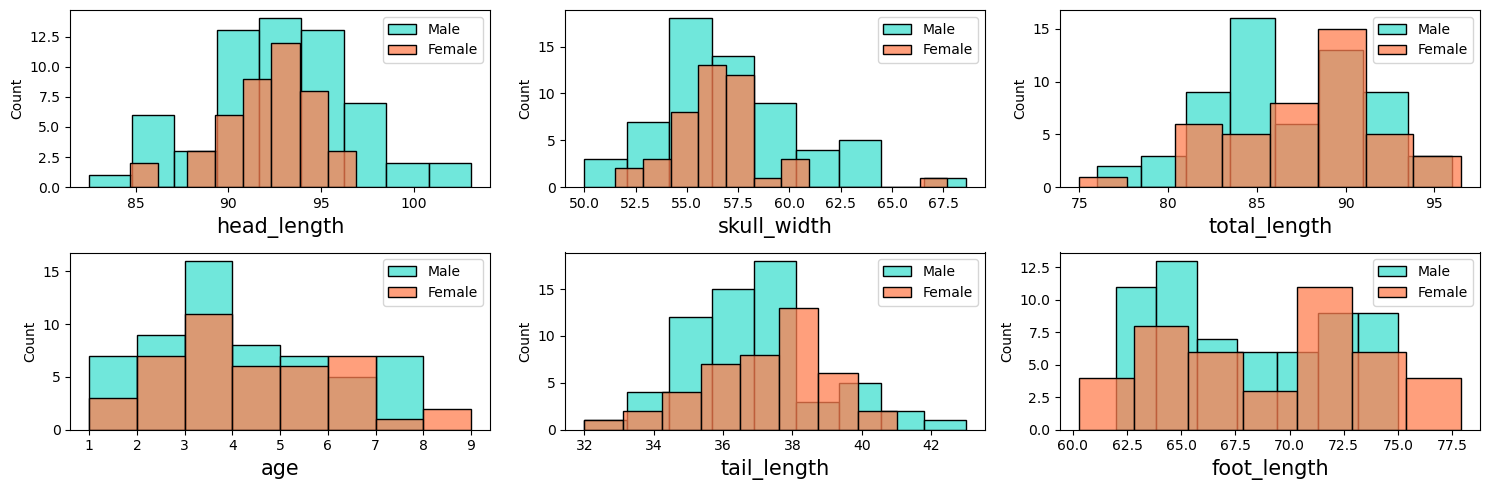

In [218]:
#성별 별로 나누기. 
raptor['sex'].replace({"m": 0, "f": 1}, inplace=True)
df_0 = raptor[raptor['sex'] == 0]
df_1 = raptor[raptor['sex'] == 1]

num_index = ['head_length', 'skull_width', 'total_length', 'age', 'tail_length', 'foot_length']

plt.figure(figsize=(15, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_0[num_index[i]], color='turquoise', label='Male')
    sns.histplot(df_1[num_index[i]], color='coral', label='Female')
    plt.xlabel(num_index[i], fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.tight_layout()

plt.show()

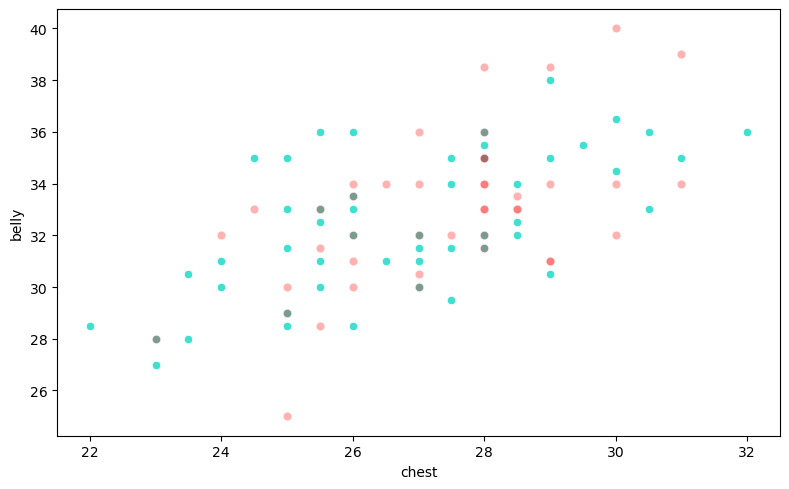

In [243]:
plt.figure(figsize= (8,5))

sns.scatterplot(x= 'chest', y= 'belly', data= df_0, color= 'turquoise' )
sns.scatterplot(x= 'chest', y= 'belly', data= df_1, color= 'red', alpha = 0.3)
plt.tight_layout()

plt.show()